In [2]:
import pandas as pd
df=pd.read_excel('data_science_analytics_source.xlsx', sheet_name='data') 
#print(df)

In [64]:
df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [3]:
df.count()
# remove the records for customer id is null
df['CustomerID'].fillna(0,inplace=True)  # fill NaN with 0
df=df.drop(df[df.CustomerID==0].index)

#print(df[df['Quantity']==-1510])  # checks if the customer id with 0 value is present
# add the column ,year,Day_of_week,and month in the df based on date

df['year']=pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y').dt.year
df['month']=pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y').dt.month
df['Day_of_Week']=pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y').dt.weekday_name


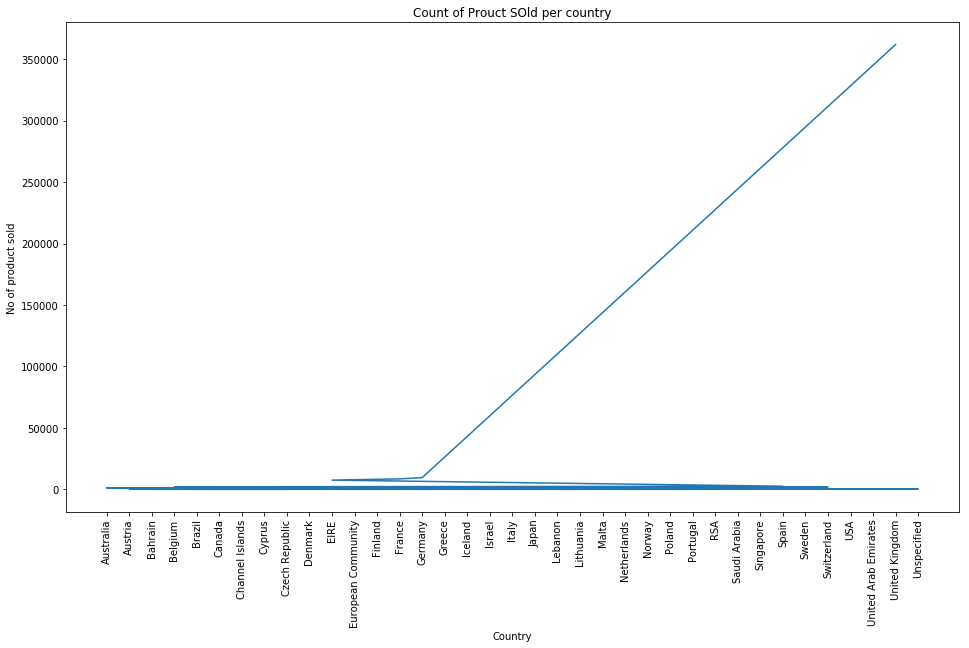

In [4]:
df_country_count=pd.DataFrame(df['Country'].value_counts())
df_country_count.reset_index(level=0, inplace=True)
df_country_count.head()

df_country_count.rename(columns={'index': 'Countrys', 'Country':'Count'},inplace=True)

X=df_country_count['Countrys'].tolist()
Y=df_country_count['Count'].tolist()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()
#ax = plt.axes()
#plt.xticks(X)
plt.plot(X,Y)
plt.xlabel('Country')
# add a label to the y axis
plt.ylabel('No of product sold')
# add a title
plt.title('Count of Prouct SOld per country')

# rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
plt.show()

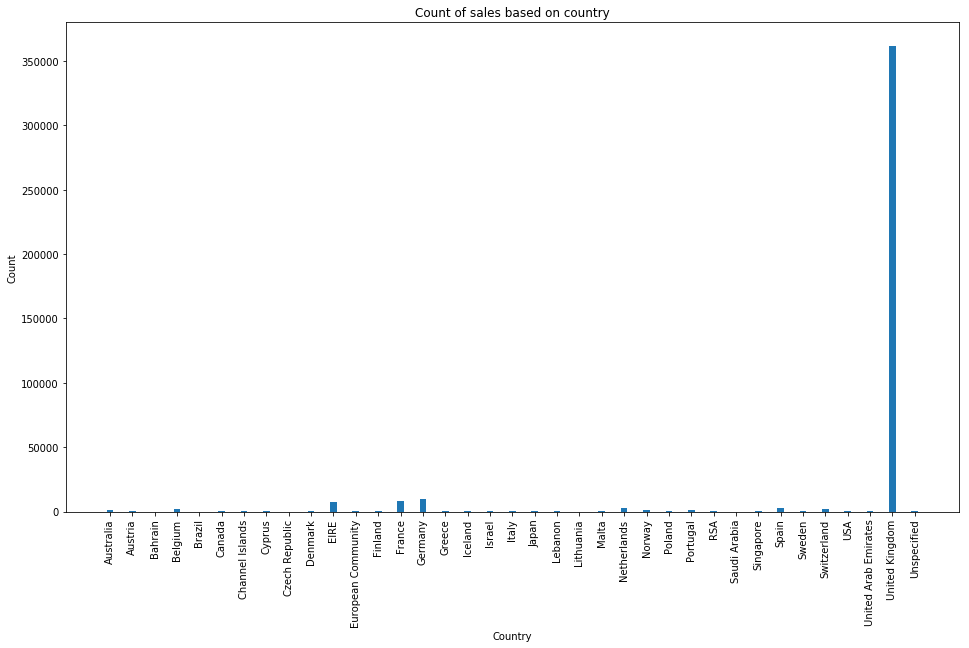

In [5]:
# representing the data in bar chart for country sale count data
plt.figure()
#xvals = range(len(linear_data))
#plt.xlabel('The number of times the child kicked a ball')
plt.bar(X, Y, width = 0.3)

x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of sales based on country')

plt.show()    
# since the output has huge varition, the next chart will show excluding the high value of UK data from df

# Find top 10 country that has maximum sales count and show in chart

         Countrys   Count
0  United Kingdom  361878
1         Germany    9495
2          France    8491
3            EIRE    7485
4           Spain    2533
5     Netherlands    2371
6         Belgium    2069
7     Switzerland    1877
8        Portugal    1480
9       Australia    1259


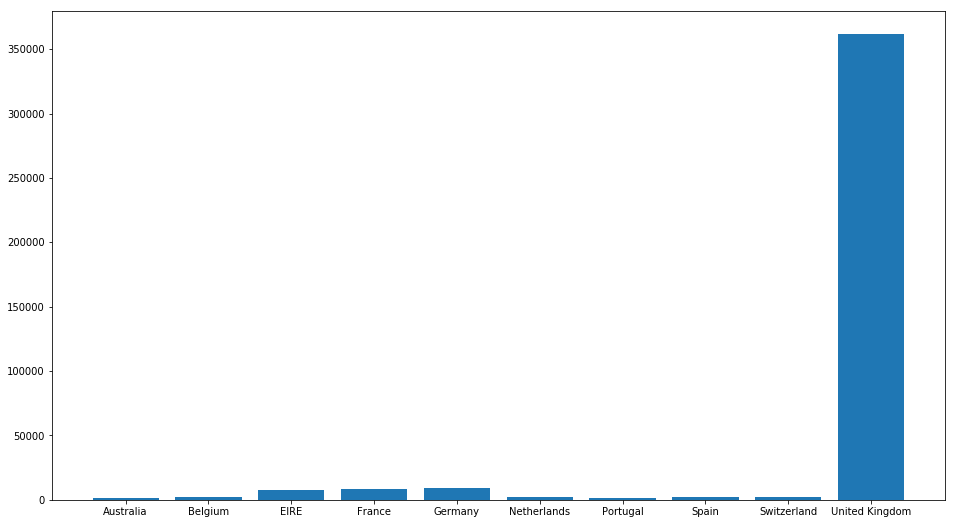

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()
df_country_count.sort_values(['Count'], inplace=True,ascending=False)
Top_10_sales_country=df_country_count.head(10)
print(Top_10_sales_country)
X=Top_10_sales_country['Countrys'].tolist()
Y=Top_10_sales_country['Count'].tolist()
plt.bar(X,Y)
plt.show()

# united kingdom has the max sales..

# as the UK has too large value compared to rest, lets exclude UK and have a look on the rest 9 whose value are in range to compare

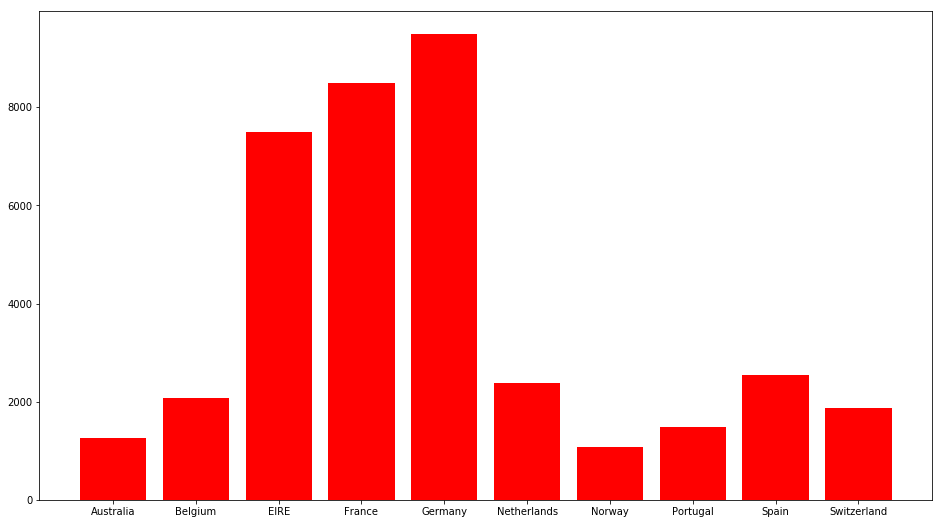

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]  # increasing the size of bar chart window
fig = plt.figure()

data=df_country_count.loc[1:10]  # excluding UK

X=data['Countrys'].tolist()
Y=data['Count'].tolist()
plt.bar(X,Y,color='r')
plt.show()

# create histogram for x as days(sunday,monday etc to find which day has how many sales for UK as it has the largest value of sales count

In [8]:
df_gp=df_uk.groupby(['year','month']).size()


NameError: name 'df_uk' is not defined

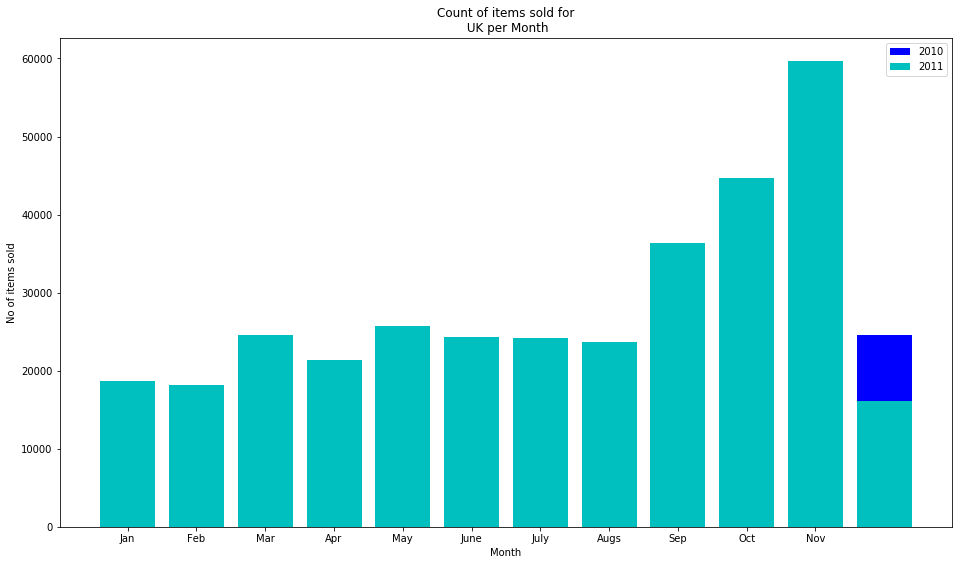

In [9]:
#new df for handlind uk only, then adding year and month column, group by year and month(multilevel index), convert multilevel index 
# to 1 level index. plot the graph
df_uk=df[df['Country']=='United Kingdom']
# adding year and month column in df
#df_uk['year'] = pd.DatetimeIndex(df_uk['InvoiceDate']).year
#df_uk['month'] = pd.DatetimeIndex(df_uk['InvoiceDate']).month
## number of items sold in each month in each group
df_gp=df_uk.groupby(['year','month']).size()
#df_gp has multible level index,, next we convert multilevel index to single index
#df_gp.swaplevel()
#df_gp.index
#df_gp
df_gp.unstack(level=0)
newdf=df_gp.unstack(level=0)
#after index conversion, we get some nan value, convet them ot 0 
newdf[2010].fillna(0, inplace=True)
#print(newdf)
# plot start
import matplotlib.pyplot as plt
import numpy
y1=[i for i in newdf[2010]]
y2=[i for i in newdf[2011]]
x=list(range(1,13))
plt.bar(x,y1,color='b',label='2010')
plt.bar(x,y2,color='c',label='2011')
plt.legend()
plt.xlabel('Month')
plt.ylabel('No of items sold')
plt.title('Count of items sold for\n UK per Month')
plt.xticks( range(1,12), ('Jan', 'Feb','Mar','Apr','May','June','July', 'Augs', 'Sep', 'Oct','Nov','Dec') )
plt.show()

In [10]:
#df_uk['month'] = pd.DatetimeIndex(df_uk['InvoiceDate']).month
df.columns
df['Day_of_Week'].unique()

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday'], dtype=object)

In [92]:
#Calculation of sales fro UK:  calculate the sale per month for UK 
df.columns # ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'Day_of_Week'],
df['sales_price']=df['Quantity']*df['UnitPrice']

df_sales_uk=df[df['Country']=='United Kingdom']
test=df_sales_uk.groupby(['year','month'],as_index=False)[['sales_price']]
## as_index will make the index to regular columns

function=['count','min','max','sum','mean']
test=df_sales_uk.groupby(['year','month'],as_index=False)[['sales_price']].agg(function)

print(test)



           sales_price                                             
                 count        min        max         sum       mean
year month                                                         
2010 12          24536   -1275.00    3828.00  483799.740  19.717955
2011 1           18738  -77183.60   77183.60  351981.280  18.784357
     2           18110    -856.48    3215.52  348853.630  19.263039
     3           24587    -555.90    2076.80  456917.870  18.583718
     4           21358   -6539.40    6539.40  376744.411  17.639499
     5           25738   -8142.75    8142.75  525573.350  20.420132
     6           24296  -38970.00   38970.00  472509.250  19.448026
     7           24170   -4287.63    3129.60  461147.601  19.079338
     8           23623   -3155.95    4176.00  477008.410  20.192542
     9           36333   -3825.36    7144.72  776529.842  21.372577
     10          44621   -1836.00    3285.00  782777.880  17.542813
     11          59691   -1038.75    3174.40  95

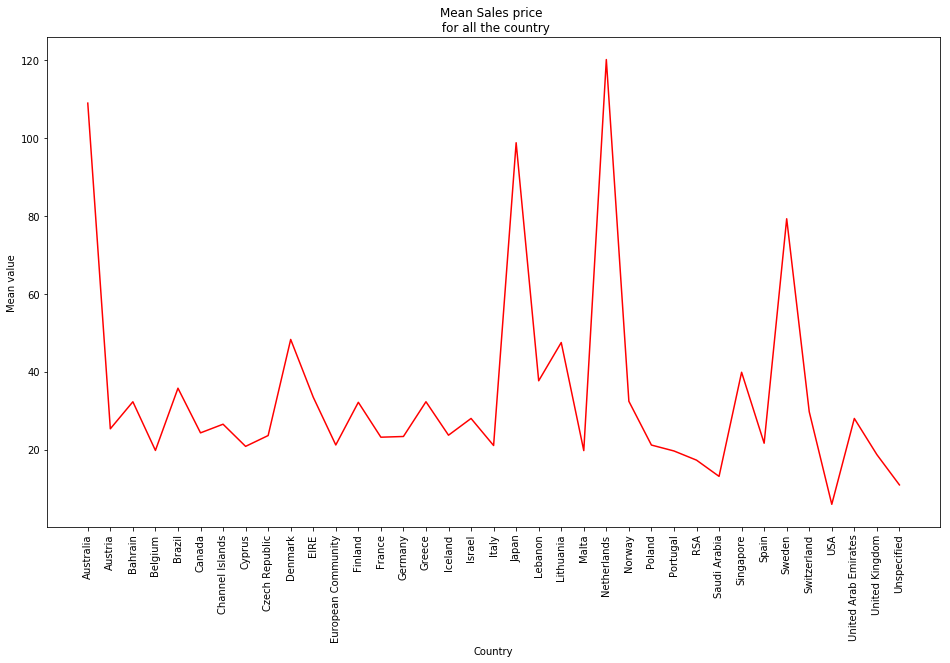

In [77]:
test=df.groupby(['Country'],as_index=False).agg({'sales_price':'mean'})
y=test['sales_price']
x=test['Country']
import matplotlib.pyplot as plt
plt.plot(x,y,color='r')

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

plt.xlabel('Country')
plt.ylabel('Mean value')
plt.title('Mean Sales price \n for all the country')
plt.show()

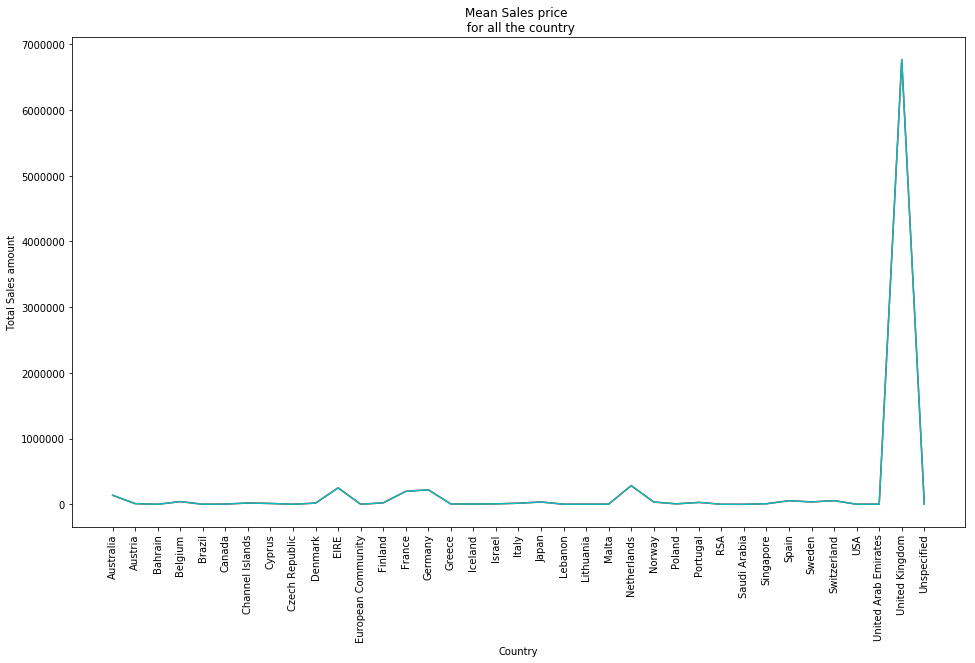

In [213]:
test=df.groupby(['Country'],as_index=False).agg({'sales_price':'sum'})
y=test['sales_price']
y1=test['sales_price']
x=test['Country']
import matplotlib.pyplot as plt
plt.plot(x,y,color='r')
plt.plot(x,y1,color='c')

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.xlabel('Country')
plt.ylabel('Total Sales amount')
plt.title('Mean Sales price \n for all the country')
plt.show()

In [135]:
df_description_unique_list=df['Description'].unique()
desc_df=pd.DataFrame(df_description_unique_list)
print(desc_df[0].sort_values(0,ascending=False))

2398       ZINC WIRE SWEETHEART LETTER TRAY
2002            ZINC WIRE KITCHEN ORGANISER
1649       ZINC WILLIE WINKIE  CANDLE STICK
1912         ZINC TOP  2 DOOR WOODEN SHELF 
5           ZINC T-LIGHT HOLDER STARS SMALL
3384        ZINC T-LIGHT HOLDER STARS LARGE
834          ZINC T-LIGHT HOLDER STAR LARGE
1115       ZINC SWEETHEART WIRE LETTER RACK
2003              ZINC SWEETHEART SOAP DISH
3504              ZINC STAR T-LIGHT HOLDER 
3551                  ZINC PLANT POT HOLDER
699             ZINC METAL HEART DECORATION
1149             ZINC HERB GARDEN CONTAINER
1403           ZINC HEARTS PLANT POT HOLDER
3585          ZINC HEART LATTICE TRAY OVAL 
2411      ZINC HEART LATTICE T-LIGHT HOLDER
3048       ZINC HEART LATTICE CHARGER SMALL
2843       ZINC HEART LATTICE CHARGER LARGE
3314      ZINC HEART LATTICE 2 WALL PLANTER
2378       ZINC HEART FLOWER T-LIGHT HOLDER
80                ZINC FOLKART SLEIGH BELLS
3498          ZINC FINISH 15CM PLANTER POTS
554                      ZINC BO

In [193]:
# count the number of items present in each country and sort by decending value
df_description_count_by_country=df.groupby(['Country','Description'])[['CustomerID']].agg('count').sort_values('CustomerID',ascending=False)
#change multidimentional index in one dimensional.
df_description_count_by_country_1=df_description_count_by_country.unstack(level=0).fillna(0)
df_all=df_description_count_by_country_1.reset_index()
df_all['CustomerID']
df_all['Description']
dfp= pd.concat([df_all['Description'],df_all['CustomerID']],axis=1)
dfp
#df_all.columns


,Description,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,4 PURPLE FLOCK DINNER CANDLES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
1,50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,99.0,0.0
2,DOLLY GIRL BEAKER,1.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0
3,I LOVE LONDON MINI BACKPACK,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0
4,I LOVE LONDON MINI RUCKSACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NINE DRAWER OFFICE TIDY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0
6,OVAL WALL MIRROR DIAMANTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0
7,RED SPOT GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,87.0,0.0
8,SET 2 TEA TOWELS I LOVE LONDON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,190.0,0.0
9,SPACEBOY BABY GIFT SET,0.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,97.0,1.0


In [ ]:
#What are the items common in most of the country?
# What is the total sales value of the popular items.


In [274]:
#List ten most sold items.
sold_most=df.groupby('Description')['Quantity'].agg('count').sort_values(ascending=False)
#.sort_values('')
df_sold_most=pd.DataFrame(sold_most)
df_top_15_items=df_sold_most.head(15)
df_15=df_top_15_items.reset_index()
df_15

df_mix=pd.merge(df_15,dfp,on='Description')
df_mix.T

# See How these top 15 form the whole items are distributed in differnt countries.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Description,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,PARTY BUNTING,LUNCH BAG RED RETROSPOT,SET OF 3 CAKE TINS PANTRY DESIGN,POSTAGE,LUNCH BAG BLACK SKULL.,PACK OF 72 RETROSPOT CAKE CASES,SPOTTY BUNTING,PAPER CHAIN KIT 50'S CHRISTMAS,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG CARS BLUE,NATURAL SLATE HEART CHALKBOARD
Quantity,2070,1905,1662,1418,1416,1358,1232,1196,1126,1080,1029,1029,1021,1012,997
Australia,1,6,5,0,8,9,10,2,4,2,7,3,8,3,1
Austria,0,2,1,2,1,0,0,14,0,1,0,0,0,1,0
Bahrain,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Belgium,0,15,10,1,2,12,6,98,1,12,3,0,11,4,2
Brazil,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Canada,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0
Channel Islands,4,5,6,1,3,7,1,0,4,5,0,3,3,2,1
Cyprus,5,8,1,2,3,1,4,1,0,0,2,0,0,0,0


0     WHITE HANGING HEART T-LIGHT HOLDER
1               REGENCY CAKESTAND 3 TIER
2                JUMBO BAG RED RETROSPOT
3          ASSORTED COLOUR BIRD ORNAMENT
4                          PARTY BUNTING
5                LUNCH BAG RED RETROSPOT
6      SET OF 3 CAKE TINS PANTRY DESIGN 
7                                POSTAGE
8                LUNCH BAG  BLACK SKULL.
9        PACK OF 72 RETROSPOT CAKE CASES
10                        SPOTTY BUNTING
11       PAPER CHAIN KIT 50'S CHRISTMAS 
12            LUNCH BAG SPACEBOY DESIGN 
13                   LUNCH BAG CARS BLUE
14       NATURAL SLATE HEART CHALKBOARD 
Name: Description, dtype: object
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
    Australia  Austria  Bahrain  Belgium  Brazil  Canada  Channel Islands  \
0         1.0      0.0      0.0      0.0     0.0     0.0              4.0   
1         6.0      2.0      1.0     15.0     1.0     1.0              5.0   
2         5.0      1.0      0.0     10.0   

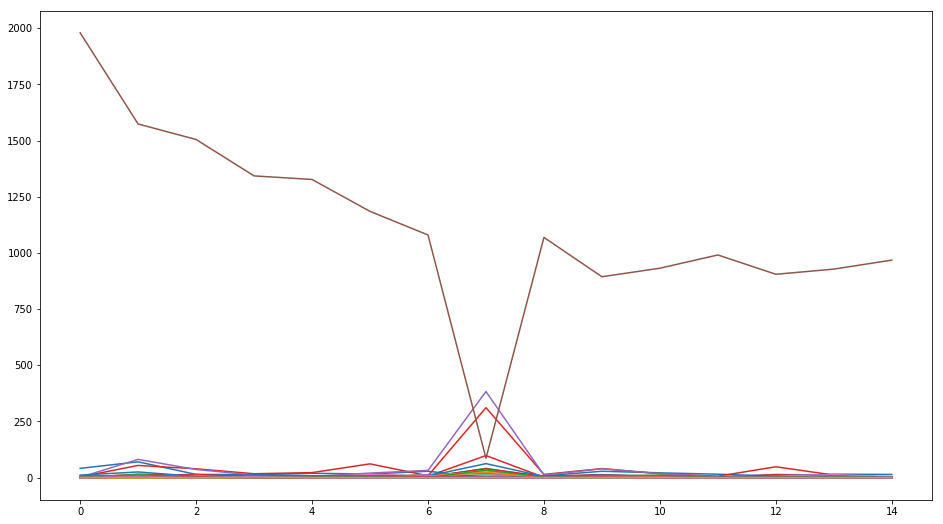

In [223]:
#import matplotlib.pyplot as plt
y=df_mix.iloc[:,2:]
x=df_mix.index
label=df_mix.iloc[:,0]
print(label)
print(x)
print(y)
plt.plot(x,y)
plt.show()

In [314]:
Y=df_mix.T
Y.index

label=Y.iloc[0]
print(label)

0     WHITE HANGING HEART T-LIGHT HOLDER
1               REGENCY CAKESTAND 3 TIER
2                JUMBO BAG RED RETROSPOT
3          ASSORTED COLOUR BIRD ORNAMENT
4                          PARTY BUNTING
5                LUNCH BAG RED RETROSPOT
6      SET OF 3 CAKE TINS PANTRY DESIGN 
7                                POSTAGE
8                LUNCH BAG  BLACK SKULL.
9        PACK OF 72 RETROSPOT CAKE CASES
10                        SPOTTY BUNTING
11       PAPER CHAIN KIT 50'S CHRISTMAS 
12            LUNCH BAG SPACEBOY DESIGN 
13                   LUNCH BAG CARS BLUE
14       NATURAL SLATE HEART CHALKBOARD 
Name: Description, dtype: object


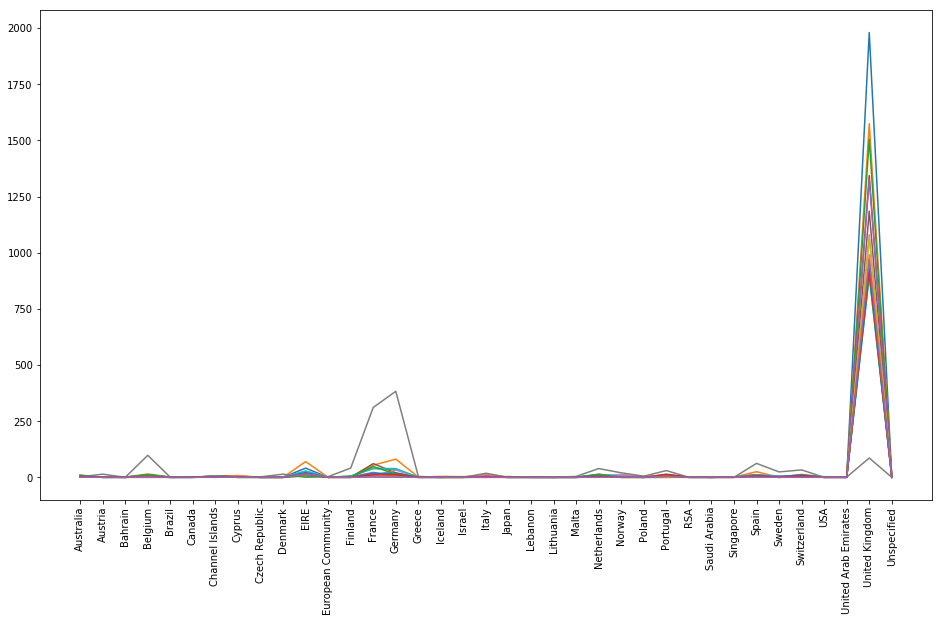

In [369]:
Y=df_mix.T
Y1=Y.drop(['Description','Quantity'])
x=Y1.index
plt.plot(x,Y1)

x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.legend()
plt.show()


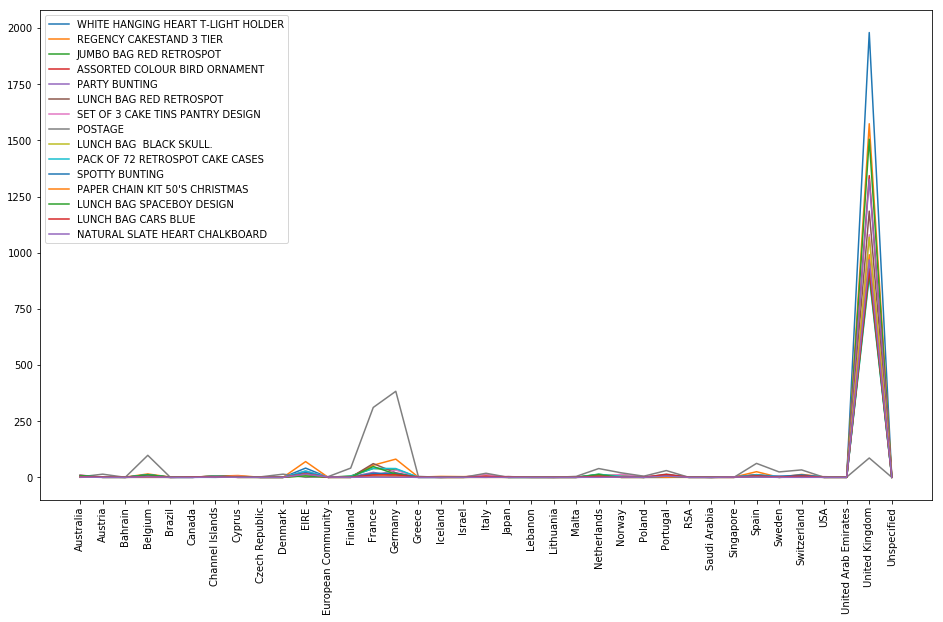

In [377]:
Y=df_mix.T

Y1=Y.drop(['Description','Quantity'])
x=Y1.index
# trying to add the legends for the graph
labels=[]
for i in range(15):
    labelss=Y.iloc[0][i]
    labels.append(labelss)
plt.plot(x,Y1)

x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

#plt.legend()
plt.legend(labels=labels)
plt.show()




In [10]:
data_url = 'http://bit.ly/2cLzoxH'
# read data from url as pandas dataframe
gapminder = pd.read_csv(data_url)
# print the first three rows
print(gapminder.head(n=3))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
